In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Carregar os dados
df = pd.read_csv('dados_preprocessados.csv')

# Selecionar colunas relevantes
features = ['colocacao_mandante', 'colocacao_visitante',
            'media_gols_mandante', 'media_gols_visitante',
            'partidas_jogadas_mandante', 'partidas_jogadas_visitante', 
            'saldo_acumulado_mandante', 'saldo_acumulado_visitante']


In [3]:
# Definir as features (X) e o target (y)
X = df[features]
y = np.where(df['gols_mandante'] > df['gols_visitante'], 1, 
             np.where(df['gols_mandante'] < df['gols_visitante'], 2, 0))

In [4]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balanceamento dos dados com RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Definir os parâmetros para o GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [5]:
# GridSearchCV para o modelo RandomForest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_res, y_train_res)
modelo_rf = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
previsoes = modelo_rf.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:

# Avaliar a precisão do modelo
acuracia = accuracy_score(y_test, previsoes)
precisao = precision_score(y_test, previsoes, average=None)
sensibilidade = recall_score(y_test, previsoes, average=None)
f1_scores = f1_score(y_test, previsoes, average=None)

In [ ]:
print("Acurácia do modelo Random Forest:", acuracia)
print("Precisão para cada classe (Empate, Vitória mandante, Vitória visitante):", precisao)
print("Sensibilidade para cada classe (Empate, Vitória mandante, Vitória visitante):", sensibilidade)
print("F1-Score para cada classe (Empate, Vitória mandante, Vitória visitante):", f1_scores)


Acurácia do modelo Random Forest: 0.5279187817258884
Precisão para cada classe (Empate, Vitória mandante, Vitória visitante): [0.33234421 0.70505051 0.46571429]
Sensibilidade para cada classe (Empate, Vitória mandante, Vitória visitante): [0.35897436 0.58655462 0.59272727]
F1-Score para cada classe (Empate, Vitória mandante, Vitória visitante): [0.34514638 0.64036697 0.5216    ]


In [ ]:
# Imprimir relatório de classificação completo
print("Relatório de classificação:")
print(classification_report(y_test, previsoes, target_names=['Empate', 'Vitória mandante', 'Vitória visitante']))


Relatório de classificação:
                   precision    recall  f1-score   support

           Empate       0.33      0.36      0.35       312
 Vitória mandante       0.71      0.59      0.64       595
Vitória visitante       0.47      0.59      0.52       275

         accuracy                           0.53      1182
        macro avg       0.50      0.51      0.50      1182
     weighted avg       0.55      0.53      0.53      1182



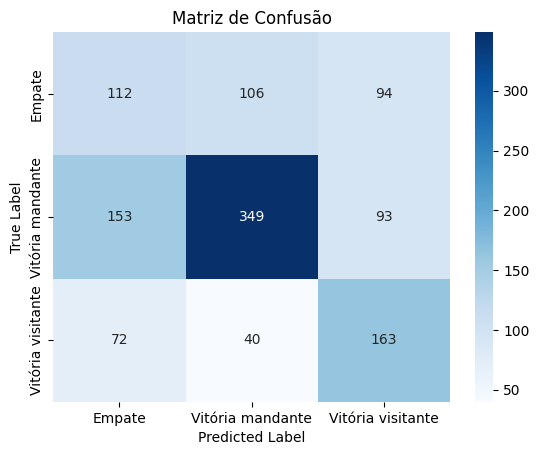

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, previsoes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Empate', 'Vitória mandante', 'Vitória visitante'], yticklabels=['Empate', 'Vitória mandante', 'Vitória visitante'])
plt.title('Matriz de Confusão')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

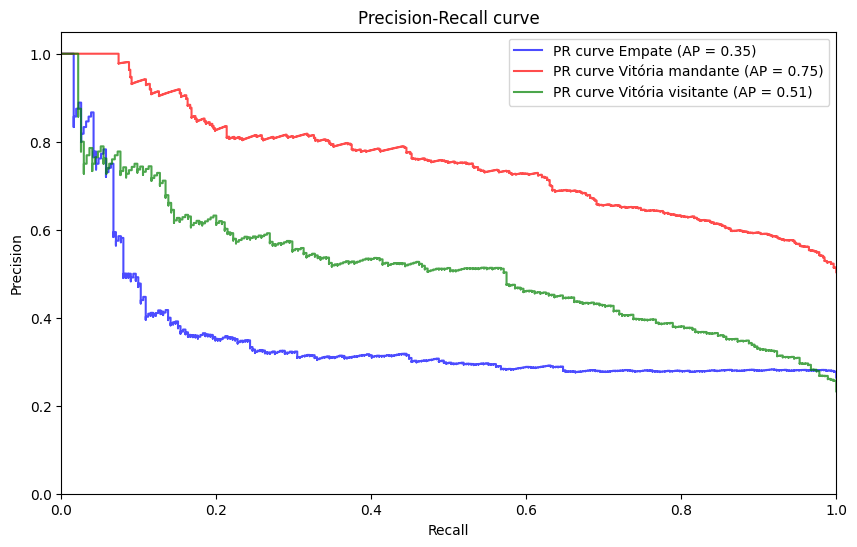

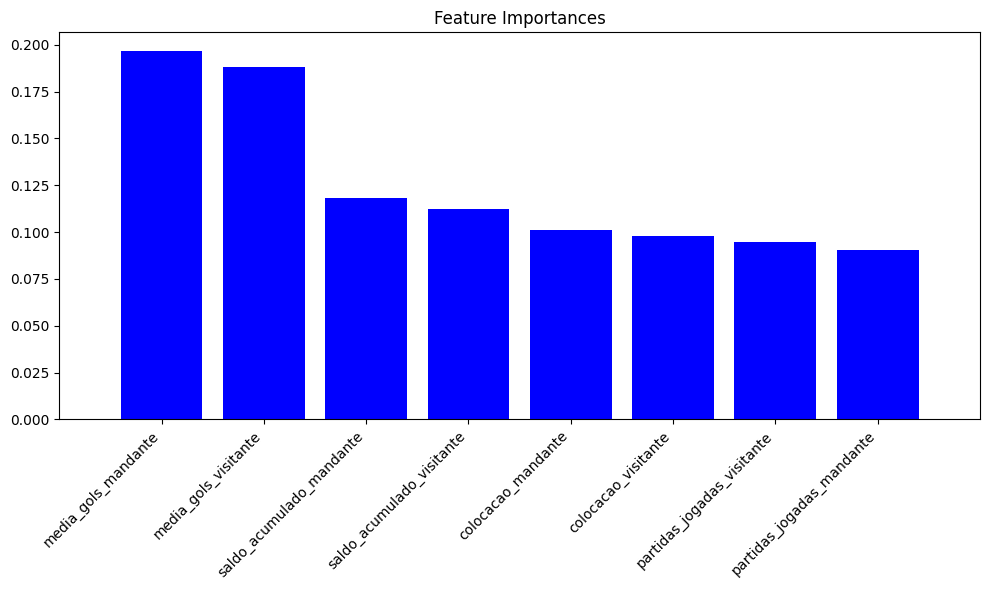

In [ ]:


# Importância das Features
importances = modelo_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="blue", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha='right')
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()
